<br><p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"> Seaborn: Exploring <br>Data Visualization</p>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"> Graphing individual variables

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [30]:
# You don't need the specific seaborn package for the styles; you can use this method from matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Plotting categorical variables

# Bar plots

In [31]:
titanic = sns.load_dataset("titanic")

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Univariate bar graph for categorical variables

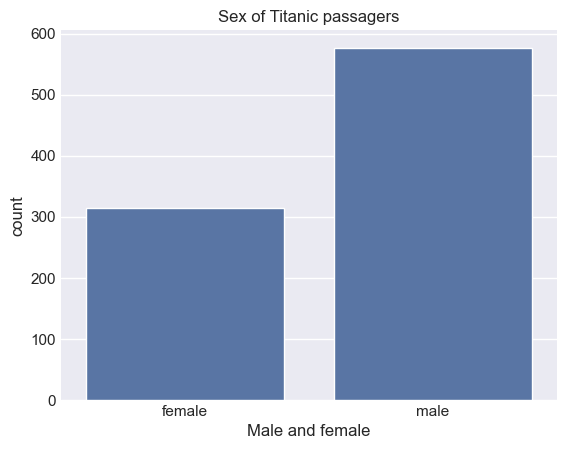

In [33]:
# First change format from numeric to categorical
titanic["sex"] = titanic["sex"].astype('category')

sns.countplot(x="sex", data=titanic)
plt.xlabel('Male and female')
plt.title('Sex of Titanic passagers');


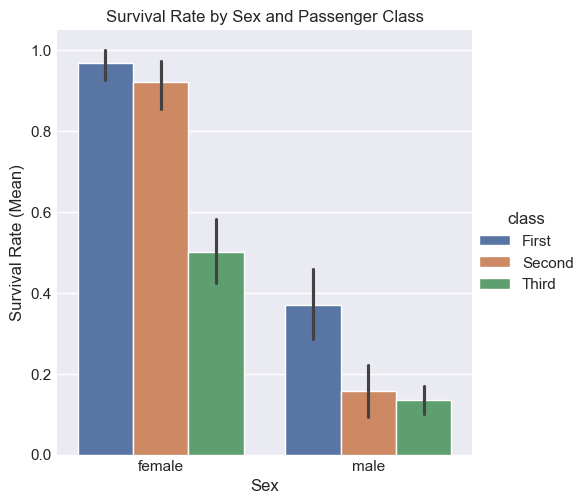

In [34]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.xlabel("Sex")
plt.ylabel("Survival Rate (Mean)")
plt.title("Survival Rate by Sex and Passenger Class")
plt.show()

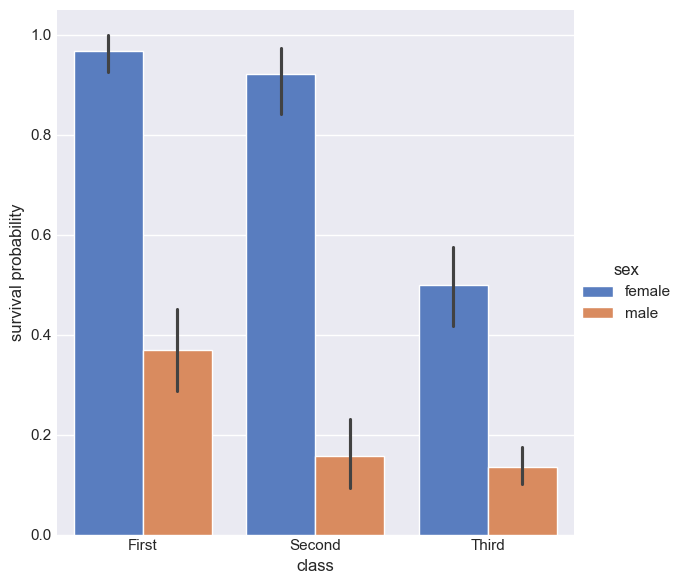

In [35]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability");

### Boxplots

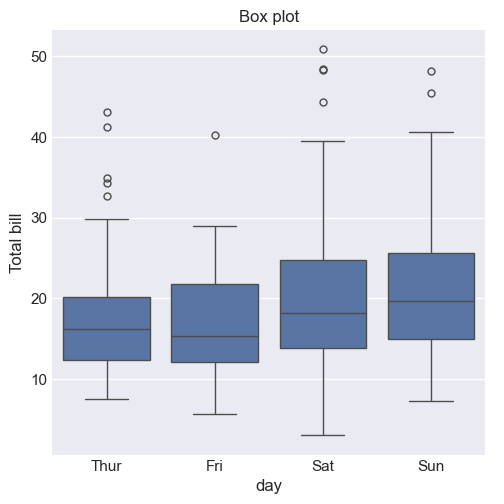

In [36]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
plt.xlabel("day")
plt.ylabel("Total bill")
plt.title("Box plot");

# Univariate histogram for quantitative variable:

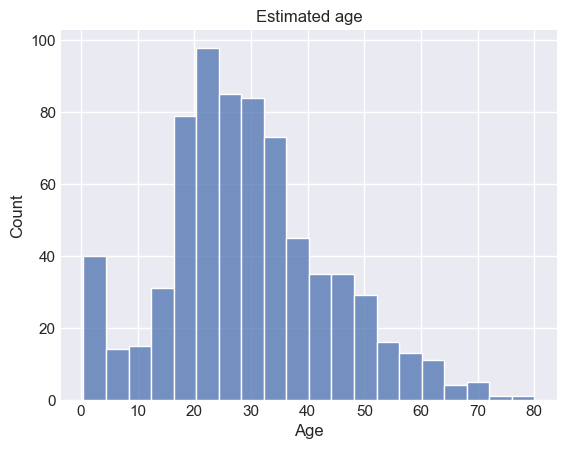

In [37]:
sns.histplot(titanic["age"].dropna(), kde=False)
plt.xlabel('Age')
plt.title('Estimated age');

C:\Users\Annick\AppData\Local\Temp\ipykernel_26680\3432015598.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x);


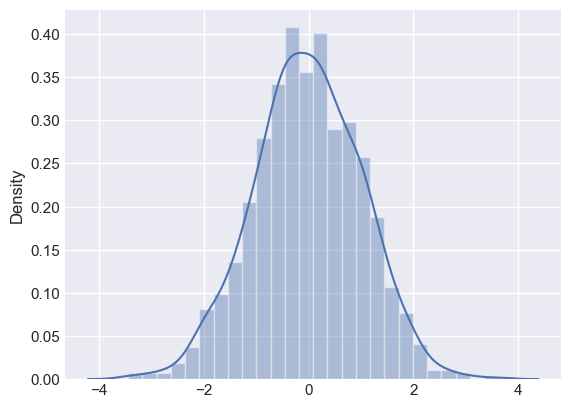

In [38]:
x = np.random.normal(size=1000)
sns.distplot(x);

C:\Users\Annick\AppData\Local\Temp\ipykernel_26680\41489027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["age"], kde=False);


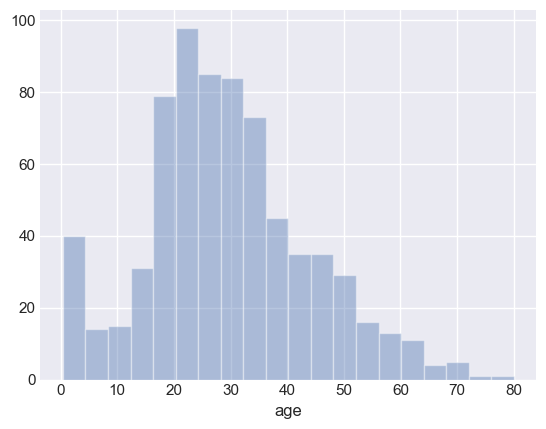

In [39]:
sns.distplot(titanic["age"], kde=False);

### Kernel density estimation

C:\Users\Annick\AppData\Local\Temp\ipykernel_26680\3336460608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'], hist=True);


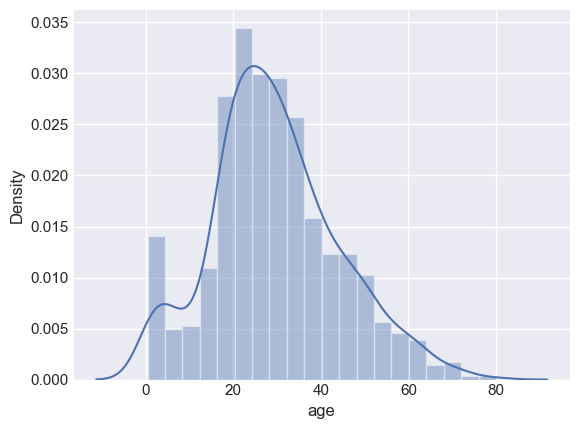

In [40]:
sns.distplot(titanic['age'], hist=True);

### Line plot

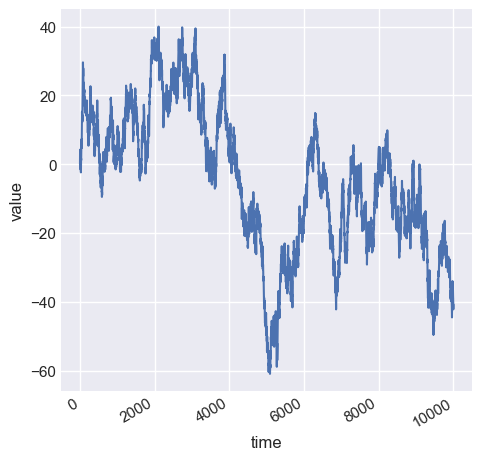

In [41]:
df = pd.DataFrame(dict(time=np.arange(10000),
                       value=np.random.randn(10000).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

# <p style="font-family: Arial; font-size:1em;color:blue; font-style:bold"> Bivariate graphics

# <p style="font-family: Arial; font-size:1em;color:blue; font-style:bold"> Bivariate bar graph C -> Q

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


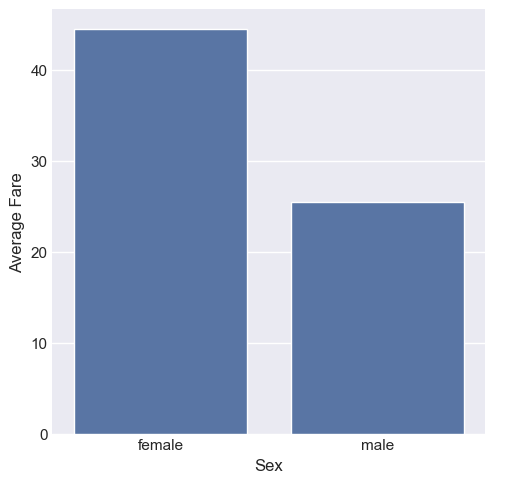

In [43]:
# bivariate bar graph C -> Q
sns.catplot(x="sex", y="fare", data=titanic, kind="bar", errorbar=None)
plt.xlabel("Sex")
plt.ylabel("Average Fare")  # Or plt.ylabel("Fare (Mean)")
plt.show()

### Scatterplot with categorical and numerical semantics
**x : categorical variable
y : numerical response variable**

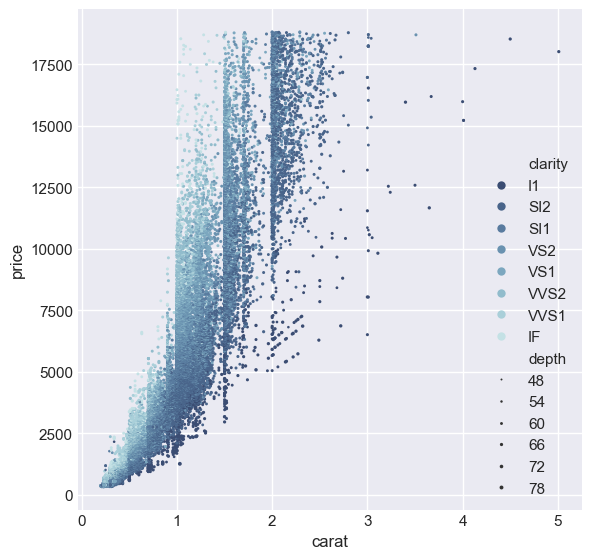

In [44]:
# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax);

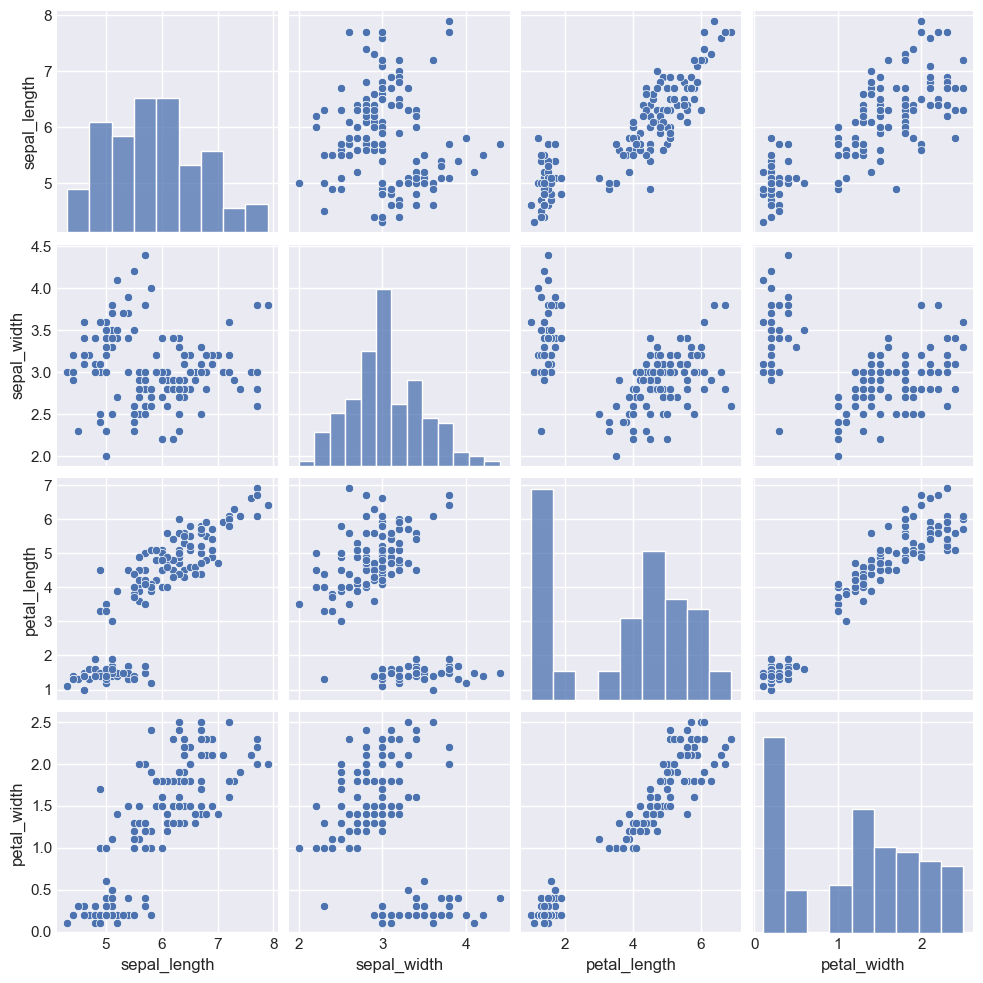

In [45]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

In [46]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


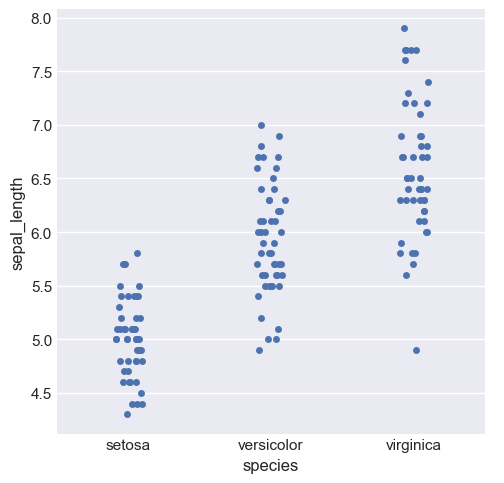

In [47]:
sns.catplot(x = 'species', y = 'sepal_length', data = iris);

# Graphing decisions: quantitative response variable

Visualizing linear relationships - multiple quantitative variable

### Basic scatter plot

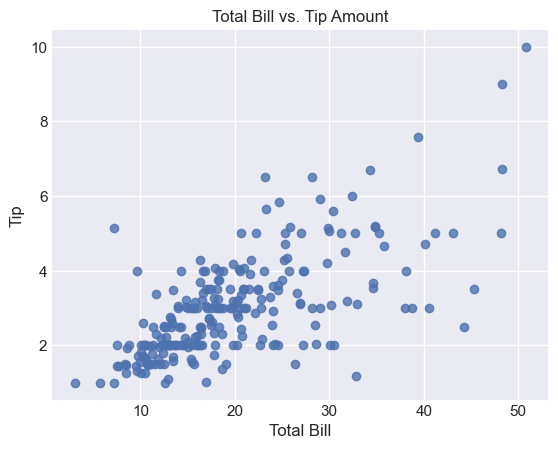

In [49]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs. Tip Amount")  # Added a title for completeness
plt.show()

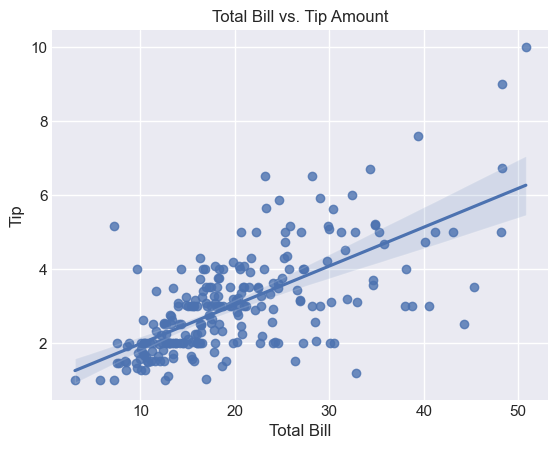

In [50]:
# fit_reg = false in order to display the line of best fit.
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=True)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs. Tip Amount")  # Added a title for completeness
plt.show()